In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp

plt.style.use("bmh")

In [2]:
his = pd.read_csv("../data/processed/temporal/historical.csv")
ssp119 = pd.read_csv("../data/processed/temporal/ssp119.csv")
ssp126 = pd.read_csv("../data/processed/temporal/ssp126.csv")
ssp245 = pd.read_csv("../data/processed/temporal/ssp245.csv")
ssp370 = pd.read_csv("../data/processed/temporal/ssp370.csv")
ssp585 = pd.read_csv("../data/processed/temporal/ssp585.csv")

Kruskal-Wallis test statistic: 46.842, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.
Dunn's test p-values (Bonferroni adjusted):
            Historical  SSP 1-1.9  SSP 1-2.6  SSP 2-4.5  SSP 3-7.0  SSP 5-8.5
Historical       1.000      0.237      0.005      0.000       0.00      0.000
SSP 1-1.9        0.237      1.000      1.000      0.961       0.27      0.163
SSP 1-2.6        0.005      1.000      1.000      1.000       1.00      1.000
SSP 2-4.5        0.000      0.961      1.000      1.000       1.00      1.000
SSP 3-7.0        0.000      0.270      1.000      1.000       1.00      1.000
SSP 5-8.5        0.000      0.163      1.000      1.000       1.00      1.000
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

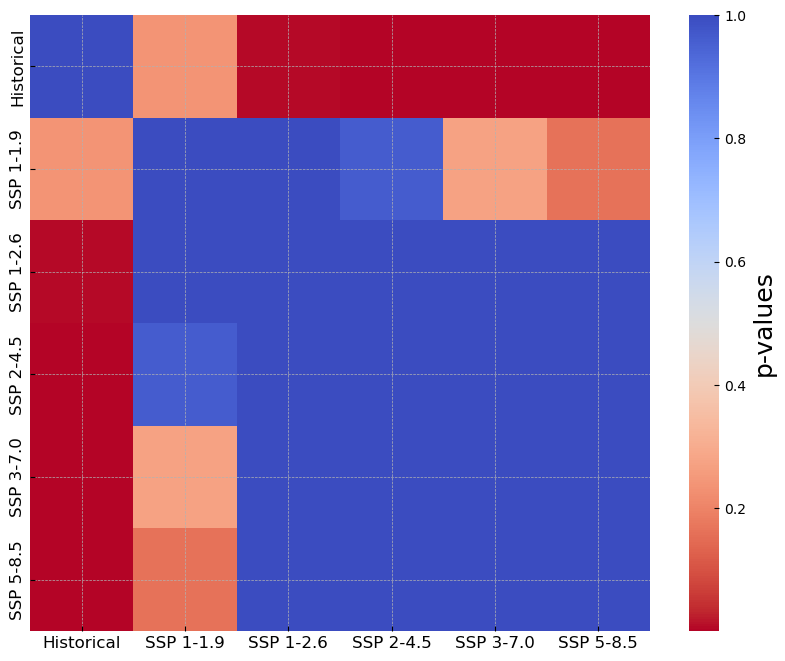

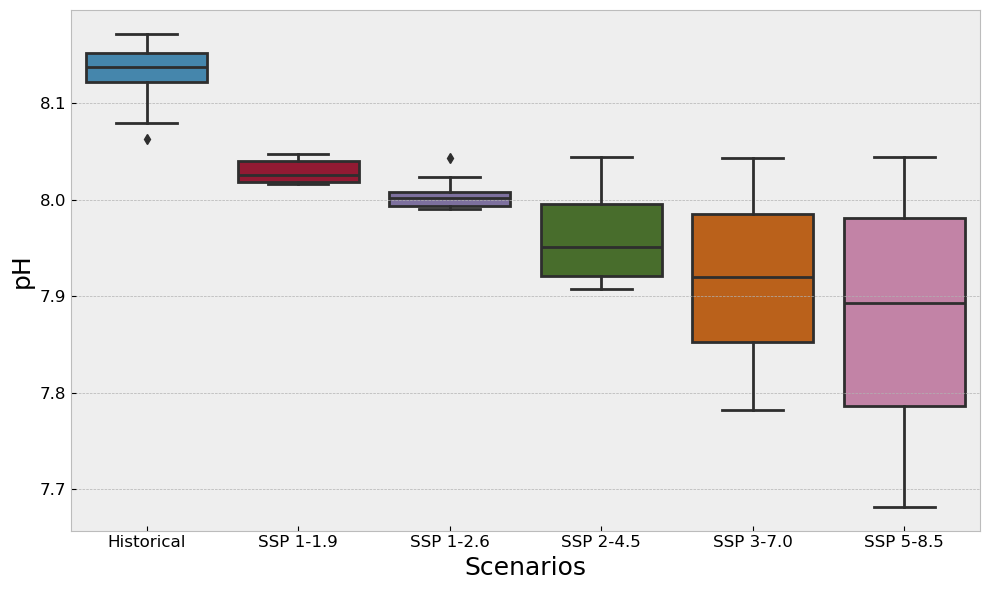

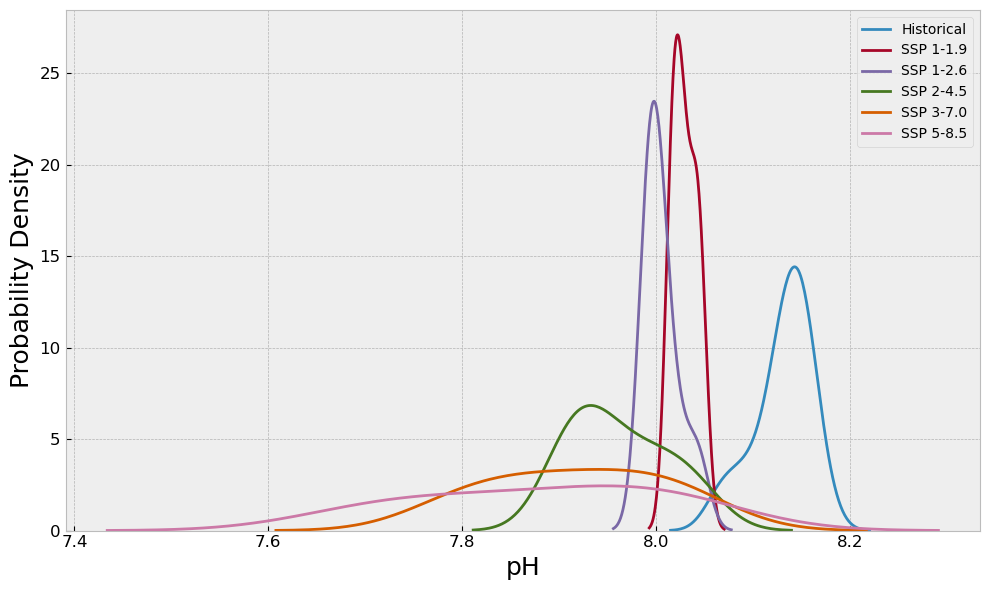

In [3]:
# Define the significance level
alpha = 0.05

# Generate dummy data with different sample sizes for the control group
data1 = ssp119['pH_med']
data2 = ssp126['pH_med']
data3 = ssp245['pH_med']
data4 = ssp370['pH_med']
data5 = ssp585['pH_med']
control = his['pH_med']

# Array of all groups for easy access
all_data = [control, data1, data2, data3, data4, data5]
labels = ['Historical', 'SSP 1-1.9', 'SSP 1-2.6', 'SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df = pd.DataFrame({'Value': data_stacked, 'Group': groups})

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median pH.")

# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
    # Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
    
    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")
    
    # Visualize Dunn's test results using a heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(dunn_pvalues, cmap='coolwarm_r', fmt=".3f", 
                     xticklabels=labels, yticklabels=labels)
    colorbar = ax.collections[0].colorbar
    colorbar.set_label('p-values', fontsize=18)
    plt.xticks(fontsize=12)  # Increased font size for x-axis labels
    plt.yticks(fontsize=12)  # Increased font size for y-axis labels
    plt.savefig('../figs/fig3d.png', dpi=450)  # Save the heatmap to a file
    
# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Scenarios', fontsize=18)
plt.ylabel('pH', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig3b.png', dpi=450)  # Save the boxplot to a file

# Create and save a Density Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(all_data):
    sns.kdeplot(group, label=labels[i])
plt.legend()
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('pH', fontsize=18)
plt.ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig3c.png', dpi=450)  # Save the density plot to a file

Kruskal-Wallis test statistic: 48.133, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.
Dunn's test p-values (Bonferroni adjusted):
            Historical  SSP 1-1.9  SSP 1-2.6  SSP 2-4.5  SSP 3-7.0  SSP 5-8.5
Historical       1.000      0.367      0.004      0.000      0.000      0.000
SSP 1-1.9        0.367      1.000      1.000      0.694      0.152      0.092
SSP 1-2.6        0.004      1.000      1.000      1.000      1.000      1.000
SSP 2-4.5        0.000      0.694      1.000      1.000      1.000      1.000
SSP 3-7.0        0.000      0.152      1.000      1.000      1.000      1.000
SSP 5-8.5        0.000      0.092      1.000      1.000      1.000      1.000
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

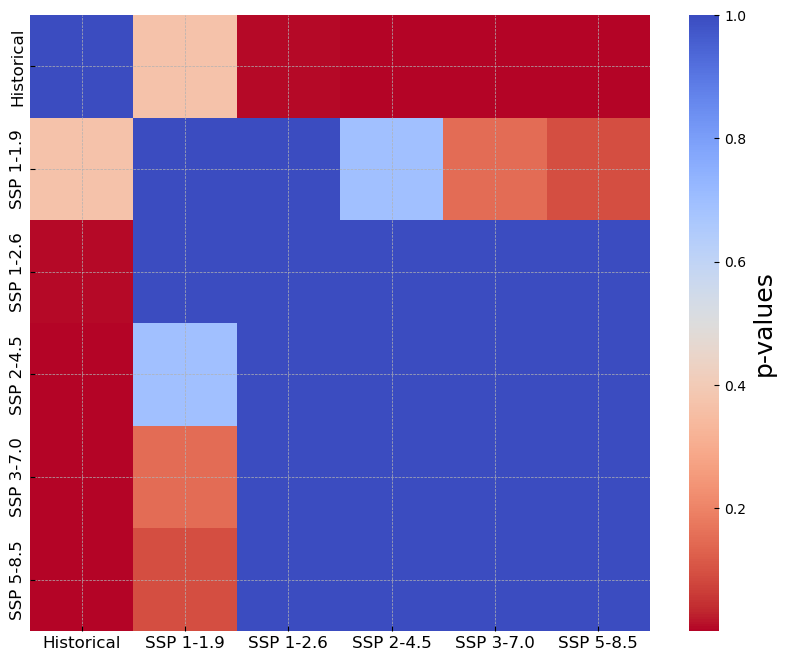

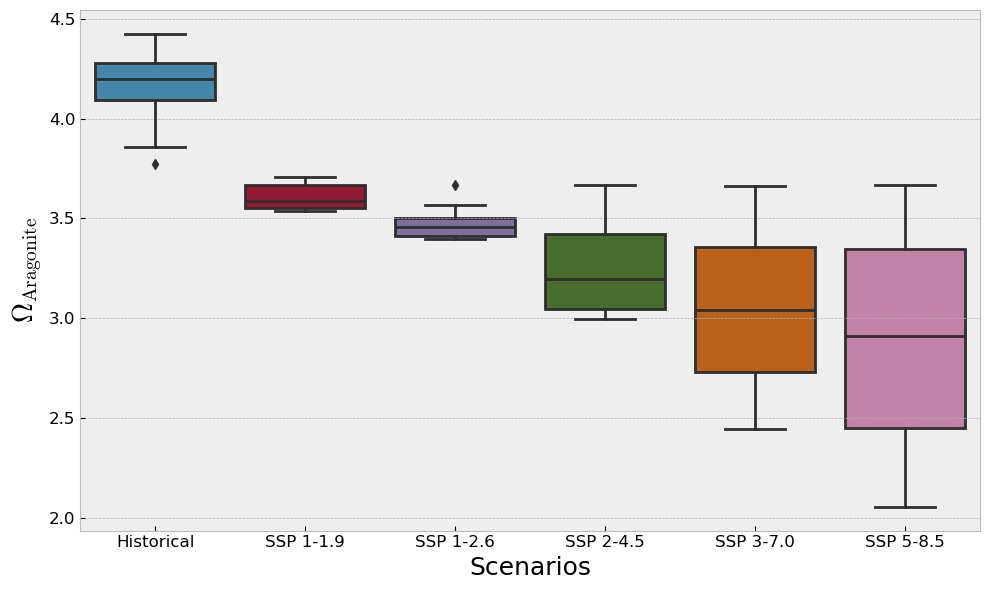

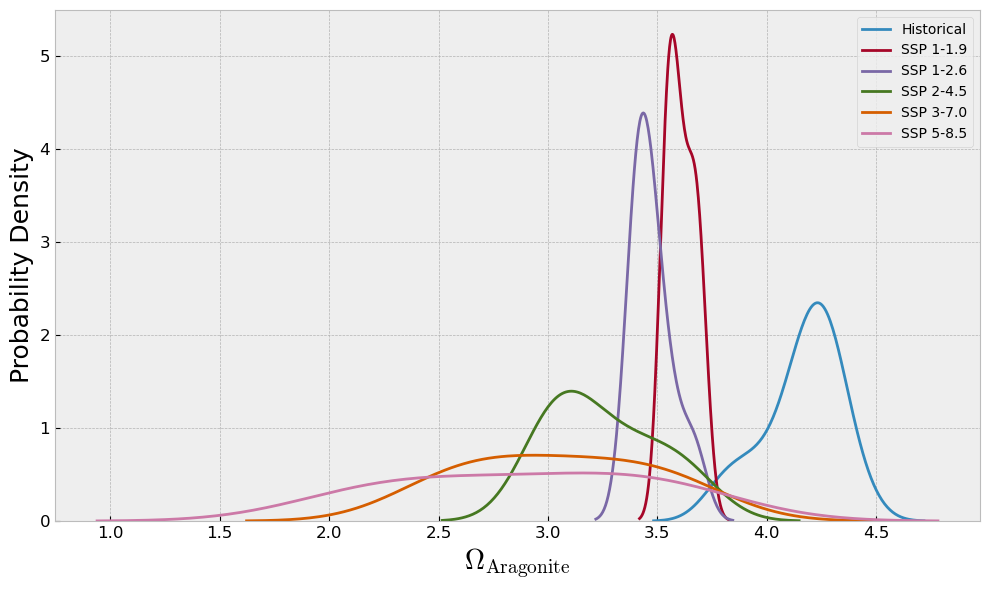

In [4]:
# Define the significance level
alpha = 0.05

# Generate dummy data with different sample sizes for the control group
data1 = ssp119['aragonite_med']
data2 = ssp126['aragonite_med']
data3 = ssp245['aragonite_med']
data4 = ssp370['aragonite_med']
data5 = ssp585['aragonite_med']
control = his['aragonite_med']

# Array of all groups for easy access
all_data = [control, data1, data2, data3, data4, data5]
labels = ['Historical', 'SSP 1-1.9', 'SSP 1-2.6', 'SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df = pd.DataFrame({'Value': data_stacked, 'Group': groups})

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median pH.")

# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
    # Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
    
    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")
    
    # Visualize Dunn's test results using a heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(dunn_pvalues, cmap='coolwarm_r', fmt=".3f", 
                     xticklabels=labels, yticklabels=labels)
    colorbar = ax.collections[0].colorbar
    colorbar.set_label('p-values', fontsize=18)
    plt.xticks(fontsize=12)  # Increased font size for x-axis labels
    plt.yticks(fontsize=12)  # Increased font size for y-axis labels
    plt.savefig('../figs/fig4d.png', dpi=450)  # Save the heatmap to a file
    
# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Scenarios', fontsize=18)
plt.ylabel(r"$\Omega_{\text{Aragonite}}$", fontsize=20)
plt.tight_layout()
plt.savefig('../figs/fig4b.png', dpi=450)  # Save the boxplot to a file

# Create and save a Density Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(all_data):
    sns.kdeplot(group, label=labels[i])
plt.legend()
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel(r"$\Omega_{\text{Aragonite}}$", fontsize=20)
plt.ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig4c.png', dpi=450)  # Save the density plot to a file

Kruskal-Wallis test statistic: 47.961, p-value: 0.000
Significant differences found among the groups.
This indicates that at least one group's median significantly differs from the others.
Dunn's test p-values (Bonferroni adjusted):
            Historical  SSP 1-1.9  SSP 1-2.6  SSP 2-4.5  SSP 3-7.0  SSP 5-8.5
Historical       1.000      0.353      0.004      0.000      0.000      0.000
SSP 1-1.9        0.353      1.000      1.000      0.737      0.163      0.096
SSP 1-2.6        0.004      1.000      1.000      1.000      1.000      1.000
SSP 2-4.5        0.000      0.737      1.000      1.000      1.000      1.000
SSP 3-7.0        0.000      0.163      1.000      1.000      1.000      1.000
SSP 5-8.5        0.000      0.096      1.000      1.000      1.000      1.000
Values below 0.05 indicate pairs of groups with statistically significant differences in medians.


/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/arya/anaconda3/envs/final_geo256_herho/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWar

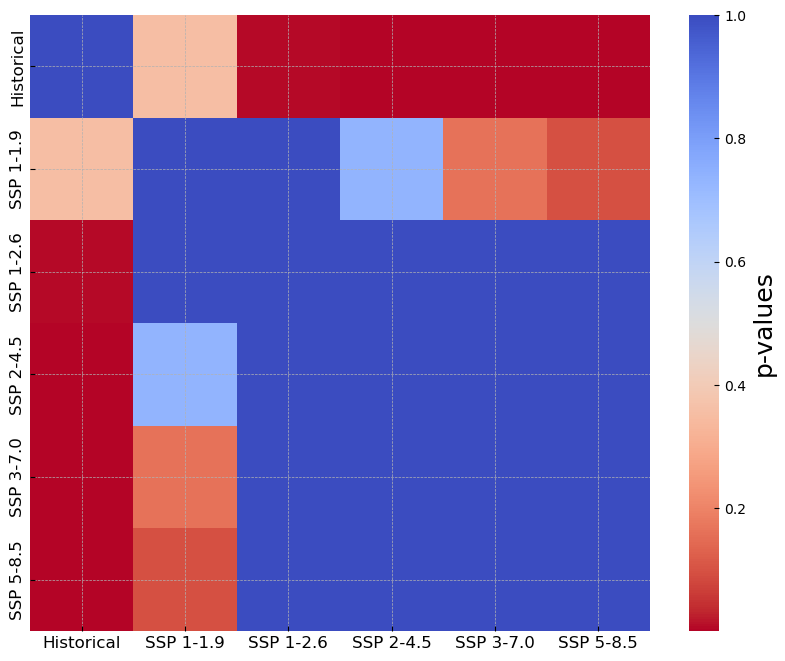

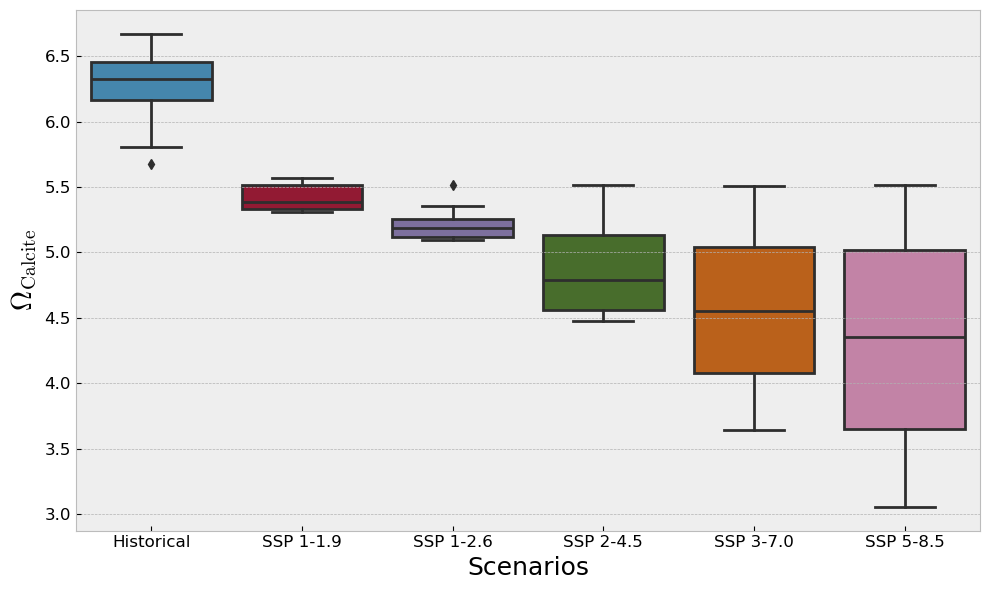

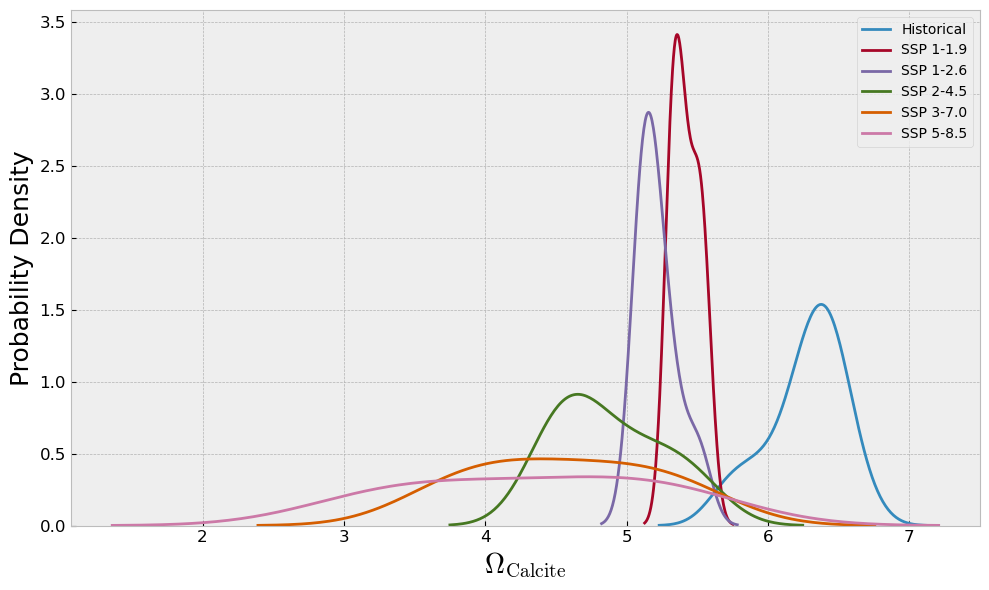

In [5]:
# Define the significance level
alpha = 0.05

# Generate dummy data with different sample sizes for the control group
data1 = ssp119['calcite_med']
data2 = ssp126['calcite_med']
data3 = ssp245['calcite_med']
data4 = ssp370['calcite_med']
data5 = ssp585['calcite_med']
control = his['calcite_med']

# Array of all groups for easy access
all_data = [control, data1, data2, data3, data4, data5]
labels = ['Historical', 'SSP 1-1.9', 'SSP 1-2.6', 'SSP 2-4.5', 'SSP 3-7.0', 'SSP 5-8.5']

# Prepare data for Dunn's test by creating a DataFrame
data_stacked = np.concatenate(all_data)
groups = np.concatenate([[label] * len(data) for data, label in zip(all_data, labels)])
df = pd.DataFrame({'Value': data_stacked, 'Group': groups})

# Perform the Kruskal-Wallis test
kw_stat, kw_pvalue = stats.kruskal(*all_data)

# Print the Kruskal-Wallis test results
print(f'Kruskal-Wallis test statistic: {kw_stat:.3f}, p-value: {kw_pvalue:.3f}')
if kw_pvalue < alpha:
    print("Significant differences found among the groups.")
    print("This indicates that at least one group's median significantly differs from the others.")
else:
    print("No significant differences found among the groups.")
    print("This suggests that there is no statistical evidence to conclude that the groups differ in median pH.")

# Proceed with Dunn's post-hoc test if significant
if kw_pvalue < alpha:
    # Dunn's post-hoc test with Bonferroni adjustment
    dunn_pvalues = sp.posthoc_dunn(df, val_col='Value', group_col='Group', p_adjust='bonferroni')
    
    # Print Dunn's test results
    print("Dunn's test p-values (Bonferroni adjusted):")
    print(dunn_pvalues.round(3))
    print("Values below 0.05 indicate pairs of groups with statistically significant differences in medians.")
    
    # Visualize Dunn's test results using a heatmap
    plt.figure(figsize=(10, 8))
    ax = sns.heatmap(dunn_pvalues, cmap='coolwarm_r', fmt=".3f", 
                     xticklabels=labels, yticklabels=labels)
    colorbar = ax.collections[0].colorbar
    colorbar.set_label('p-values', fontsize=18)
    plt.xticks(fontsize=12)  # Increased font size for x-axis labels
    plt.yticks(fontsize=12)  # Increased font size for y-axis labels
    plt.savefig('../figs/fig5d.png', dpi=450)  # Save the heatmap to a file
    
# Visualizations for each group
# Create and save a Boxplot
plt.figure(figsize=(10, 6))
sns.boxplot(x='Group', y='Value', data=df)
plt.xticks(ticks=np.arange(len(labels)), labels=labels, fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel('Scenarios', fontsize=18)
plt.ylabel(r"$\Omega_{\text{Calcite}}$", fontsize=20)
plt.tight_layout()
plt.savefig('../figs/fig5b.png', dpi=450)  # Save the boxplot to a file

# Create and save a Density Plot
plt.figure(figsize=(10, 6))
for i, group in enumerate(all_data):
    sns.kdeplot(group, label=labels[i])
plt.legend()
plt.xticks(fontsize=12)  # Increased font size for x-axis labels
plt.yticks(fontsize=12)  # Increased font size for y-axis labels
plt.xlabel(r"$\Omega_{\text{Calcite}}$", fontsize=20)
plt.ylabel('Probability Density', fontsize=18)
plt.tight_layout()
plt.savefig('../figs/fig5c.png', dpi=450)  # Save the density plot to a file